In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

from joblib import load

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df1 = pd.read_csv('base_processada_sh.csv')  # without hashtags
df1['processed_text'] = df1['processed_text'].fillna('')

In [3]:
# loading models
naive_bayes = load('models\\naive_bayes.joblib')
logistic_regression = load('models\\logistic_regression.joblib')
linear_SVM = load('models\\linear_SVM.joblib')
random_forest = load('models\\random_forest.joblib')

tfidf_transformer = load('models\\vectorizer.joblib')

In [4]:
df1.drop('username', axis=1)  # print df without usernames

,month,cap,text,processed_text
0,Janeiro,0.660850,☝️E jornalista sabichão apoiando reforma fasci...,emoticon_positivo ️ jornalista sabichão apoian...
1,Janeiro,NaN,Isso é só uma demostração do que virar quando ...,demostração virar chegar congresso
2,Janeiro,0.866291,Governo diz que espera aprovar reforma da Prev...,governo diz espera aprovar 1º semestre
3,Janeiro,0.260368,"Joice, mudadando de assunto, é verdade q o gov...",joice mudadando assunto verdade governo pedind...
4,Janeiro,NaN,meu pai foi muito bolsominion arrepedindo fala...,pai bolsominion arrepedindo falando discurso m...
...,...,...,...,...
980572,Novembro,0.743721,Amoedo fosse presidente estaria jantando com R...,amoedo presidente estaria jantando rodrigo mai...
980573,Novembro,0.346921,Essa devia ter sido a primeira reforma. Depois...,devia ter sido primeira modernização decente c...
980574,Novembro,0.376790,Se for preciso podemos fazer uma vakinha p ela...,preciso podemos fazer vakinha ir pessoalmente ...
980575,Novembro,0.847463,Sindicato tenta barrar reforma da previdência ...,sindicato tenta barrar governo goiás justiça


In [5]:
X_tfidf = tfidf_transformer.transform(df1['processed_text'])

In [6]:
y_previsto_MNB =  naive_bayes.predict(X_tfidf)
y_previsto_LR = logistic_regression.predict(X_tfidf)
y_previsto_LSVM = linear_SVM.predict(X_tfidf)
y_previsto_RF = random_forest.predict(X_tfidf)

In [7]:
resultado1 = pd.DataFrame(data={'month': df1['month'], 'username': df1['username'], 'text' : df1['text'],
 'processed_text' : df1['processed_text'], 'Naive_Bayes' : y_previsto_MNB, 'Logistic_Regression' : y_previsto_LR, 'SVM' : y_previsto_LSVM, 'Random_Forest' : y_previsto_RF})

In [8]:
resultado1.drop('username', axis=1)  # print result hiding usernames

,month,text,processed_text,Naive_Bayes,Logistic_Regression,SVM,Random_Forest
0,Janeiro,☝️E jornalista sabichão apoiando reforma fasci...,emoticon_positivo ️ jornalista sabichão apoian...,Positivo,Positivo,Positivo,Positivo
1,Janeiro,Isso é só uma demostração do que virar quando ...,demostração virar chegar congresso,Negativo,Neutro,Neutro,Neutro
2,Janeiro,Governo diz que espera aprovar reforma da Prev...,governo diz espera aprovar 1º semestre,Neutro,Neutro,Neutro,Neutro
3,Janeiro,"Joice, mudadando de assunto, é verdade q o gov...",joice mudadando assunto verdade governo pedind...,Negativo,Negativo,Negativo,Negativo
4,Janeiro,meu pai foi muito bolsominion arrepedindo fala...,pai bolsominion arrepedindo falando discurso m...,Positivo,Positivo,Positivo,Neutro
...,...,...,...,...,...,...,...
980572,Novembro,Amoedo fosse presidente estaria jantando com R...,amoedo presidente estaria jantando rodrigo mai...,Neutro,Neutro,Neutro,Neutro
980573,Novembro,Essa devia ter sido a primeira reforma. Depois...,devia ter sido primeira modernização decente c...,Negativo,Neutro,Neutro,Neutro
980574,Novembro,Se for preciso podemos fazer uma vakinha p ela...,preciso podemos fazer vakinha ir pessoalmente ...,Negativo,Neutro,Neutro,Neutro
980575,Novembro,Sindicato tenta barrar reforma da previdência ...,sindicato tenta barrar governo goiás justiça,Negativo,Neutro,Neutro,Neutro


In [9]:
resultado1['Naive_Bayes'].value_counts().to_frame()

,Naive_Bayes
Positivo,409855
Neutro,358335
Negativo,212387


In [10]:
resultado1['Logistic_Regression'].value_counts().to_frame()

,Logistic_Regression
Neutro,724700
Positivo,209452
Negativo,46425


In [11]:
resultado1['SVM'].value_counts().to_frame()

,SVM
Neutro,704255
Positivo,222860
Negativo,53462


In [12]:
resultado1['Random_Forest'].value_counts().to_frame()

,Random_Forest
Neutro,842722
Positivo,69066
Negativo,68789


## Comportamento Bots

In [13]:
bots = []

for i in df1.itertuples():
    # cap >= 0.90
    if i[3] >= 0.90 and i[2] not in bots:
        bots.append(i[2])

In [14]:
len(bots)

8180

In [15]:
idx_tweets = []

for i in df1.itertuples():
    if i[3] >= 0.90:
        idx_tweets.append(i[0])

In [16]:
len(idx_tweets)

40151

### Resultado: 8180 contas únicas automatizadas totalizando 40151 tweets

## Classificação dos modelos para os tweets dos bots

In [17]:
data = []
for i in idx_tweets:
    data.append(resultado1.iloc[i])

df_bots = pd.DataFrame(data=data)
df_bots.drop(['month', 'username'], axis=1, inplace=True)
df_bots

,text,processed_text,Naive_Bayes,Logistic_Regression,SVM,Random_Forest
8,"Em mensagem ao Congresso, Bolsonaro anunciará ...",mensagem congresso bolsonaro anunciará,Positivo,Positivo,Positivo,Neutro
32,Militares estarão na reforma da Previdência do...,militares estarão governo diz secretário,Neutro,Neutro,Neutro,Neutro
39,#jn congresso nacional concentrara na reforma ...,congresso nacional concentrara,Neutro,Neutro,Neutro,Neutro
68,"Em mensagem ao Congresso, Bolsonaro anunciará ...",mensagem congresso bolsonaro anunciará,Positivo,Positivo,Positivo,Neutro
76,"Em mensagem ao Congresso, Bolsonaro anunciará ...",mensagem congresso bolsonaro anunciará,Positivo,Positivo,Positivo,Neutro
...,...,...,...,...,...,...
980404,CONFIRA MATÉRIA QUE FALAMOS SOBRE A REFORMA DA...,confira matéria falamos sobre,Neutro,Neutro,Neutro,Neutro
980422,Entenda as regras de transição da reforma da P...,entenda regras transição,Neutro,Neutro,Neutro,Neutro
980472,Reforma da previdência ataca os pobres e traba...,ataca pobres trabalhadores protege políticos,Positivo,Neutro,Neutro,Neutro
980540,Parlamentares de 13 partidos protocolaram nest...,parlamentares 13 partidos protocolaram nesta q...,Neutro,Neutro,Neutro,Neutro


In [18]:
nb = Counter(df_bots['Naive_Bayes'])
lr = Counter(df_bots['Logistic_Regression'])
svm = Counter(df_bots['SVM'])
rf = Counter(df_bots['Random_Forest'])

In [19]:
print(f'Naive Bayes: {nb}')
print(f'Logistic Regression: {lr}')
print(f'SVM: {svm}')
print(f'Random Forest: {rf}')

Naive Bayes: Counter({'Neutro': 21814, 'Positivo': 13199, 'Negativo': 5138})
Logistic Regression: Counter({'Neutro': 34786, 'Positivo': 4577, 'Negativo': 788})
SVM: Counter({'Neutro': 34426, 'Positivo': 4814, 'Negativo': 911})
Random Forest: Counter({'Neutro': 37934, 'Positivo': 1115, 'Negativo': 1102})


In [20]:
values_nb = [nb['Positivo'], nb['Neutro'], nb['Negativo']]
values_lr = [lr['Positivo'], lr['Neutro'], lr['Negativo']]
values_svm = [svm['Positivo'], svm['Neutro'], svm['Negativo']]
values_rf = [rf['Positivo'], rf['Neutro'], rf['Negativo']]

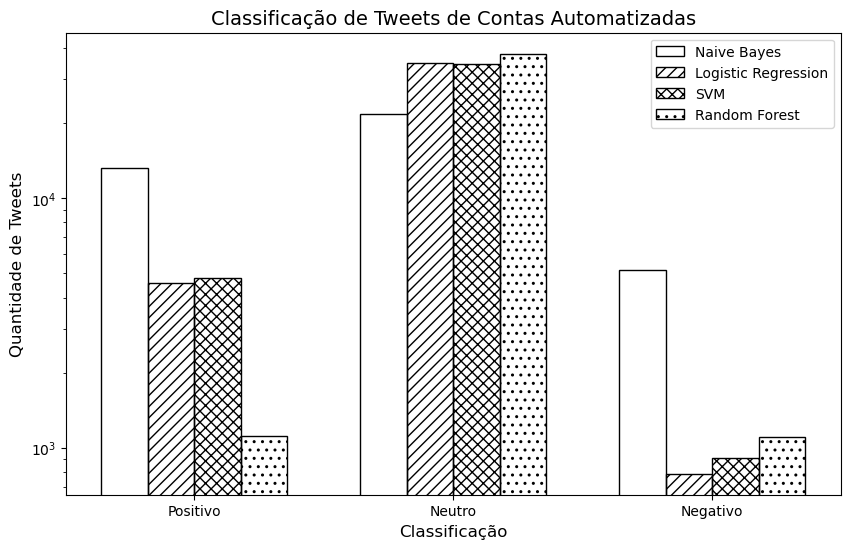

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

labels = ['Positivo', 'Neutro', 'Negativo']

x = np.arange(len(labels))
w = 0.18  # width

ax.bar(x, values_nb, w, label='Naive Bayes', fill=False, edgecolor='black')
ax.bar(x + w, values_lr, w, label='Logistic Regression', hatch='///', fill=False, edgecolor='black')
ax.bar(x + (2*w), values_svm, w, label='SVM', hatch='xxx', fill=False, edgecolor='black')
ax.bar(x + (3*w), values_rf, w, label='Random Forest', hatch='..', fill=False, edgecolor='black')

ax.set_title('Classificação de Tweets de Contas Automatizadas', fontsize=14)
ax.set_ylabel('Quantidade de Tweets', fontsize=12)
ax.set_xlabel('Classificação', fontsize=12)
ax.set_xticks(x+(3*w)/2)
ax.set_xticklabels(labels)
ax.set_yscale('log')

ax.legend(fontsize=10)
plt.show()

## Classificação de contas inacessíveis

In [22]:
list_nan = []

for i in df1.itertuples():
    # i[2] username | i[3] cap
    
    if np.isnan(i[3]) and i[2] not in list_nan:
        list_nan.append(i[2])

print(f'Contas Inacessíveis: {len(list_nan)}')

Contas Inacessíveis: 49917


In [23]:
idx_tweets2 = []  # tweets from unreachable (for Botometer API) accounts
for i in df1.itertuples():
    if np.isnan(i[3]):
        idx_tweets2.append(i[0])

print(len(idx_tweets2))

184054


### Resultado: 49917 contas inacessíveis pela API totalizando 184054 tweets

In [24]:
data = []
for i in idx_tweets2:
    data.append(resultado1.iloc[i])

df = pd.DataFrame(data=data)
df.drop(['month', 'username'], axis=1, inplace=True)
df

,text,processed_text,Naive_Bayes,Logistic_Regression,SVM,Random_Forest
1,Isso é só uma demostração do que virar quando ...,demostração virar chegar congresso,Negativo,Neutro,Neutro,Neutro
4,meu pai foi muito bolsominion arrepedindo fala...,pai bolsominion arrepedindo falando discurso m...,Positivo,Positivo,Positivo,Neutro
7,Por que ninguém menciona os políticos na refor...,ninguém menciona políticos regalias vantagens ...,Positivo,Positivo,Positivo,Neutro
9,Os caras sabem que a reforma da previdência se...,caras sabem votada outro texto insistem critic...,Positivo,Neutro,Positivo,Neutro
18,"Querem a reforma da Previdência? Se, sim, ela ...",querem sim deve ser então todos,Negativo,Positivo,Negativo,Positivo
...,...,...,...,...,...,...
980557,Aqui em Londrina já vi professor phd em econom...,aqui londrina vi professor phd economia dando ...,Negativo,Positivo,Positivo,Positivo
980559,"@jairbolsonaro Reforma da previdência,...sei. ...",sei acaso alguma lembrança comentário sobre fa...,Positivo,Neutro,Neutro,Neutro
980561,Reforma da previdência Privatizações e conceçõ...,privatizações conceções injetando capital pesa...,Neutro,Neutro,Neutro,Neutro
980563,Se o brasileiro está assistindo a coisas horrí...,brasileiro assistindo coisas horríveis indecen...,Positivo,Neutro,Neutro,Neutro


In [25]:
nb2 = Counter(df['Naive_Bayes'])
lr2 = Counter(df['Logistic_Regression'])
svm2 = Counter(df['SVM'])
rf2 = Counter(df['Random_Forest'])

In [26]:
print(f'Naive Bayes: {nb2}')
print(f'Logistic Regression: {lr2}')
print(f'SVM: {svm2}')
print(f'Random Forest: {rf2}')

Naive Bayes: Counter({'Positivo': 80591, 'Neutro': 57188, 'Negativo': 46275})
Logistic Regression: Counter({'Neutro': 128274, 'Positivo': 44818, 'Negativo': 10962})
SVM: Counter({'Neutro': 124353, 'Positivo': 47222, 'Negativo': 12479})
Random Forest: Counter({'Neutro': 152545, 'Negativo': 16271, 'Positivo': 15238})


In [27]:
nb_values = [nb2['Positivo'], nb2['Neutro'], nb2['Negativo']]
lr_values = [lr2['Positivo'], lr2['Neutro'], lr2['Negativo']]
svm_values = [svm2['Positivo'], svm2['Neutro'], svm2['Negativo']]
rf_values = [rf2['Positivo'], rf2['Neutro'], rf2['Negativo']]

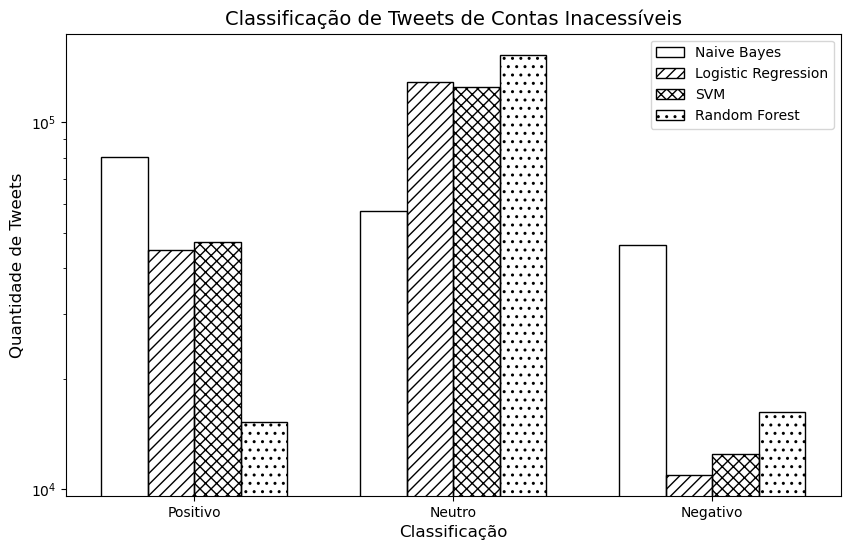

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

labels = ['Positivo', 'Neutro', 'Negativo']

x = np.arange(len(labels))
w = 0.18  # width

ax.bar(x, nb_values, w, label='Naive Bayes', fill=False, edgecolor='black')
ax.bar(x + w, lr_values, w, label='Logistic Regression', hatch='///', fill=False, edgecolor='black')
ax.bar(x + (2*w), svm_values, w, label='SVM', hatch='xxx', fill=False, edgecolor='black')
ax.bar(x + (3*w), rf_values, w, label='Random Forest', hatch='..', fill=False, edgecolor='black')

ax.set_title('Classificação de Tweets de Contas Inacessíveis', fontsize=14)
ax.set_ylabel('Quantidade de Tweets', fontsize=12)
ax.set_xlabel('Classificação', fontsize=12)
ax.set_xticks(x+(3*w)/2)
ax.set_xticklabels(labels)
ax.set_yscale('log')

ax.legend(fontsize=10)
plt.show()

<hr>

## Classificação 2 (considerando as hashtags)

In [29]:
df2 = pd.read_csv('base_processada.csv')  # with hashtags
df2['processed_text'] = df2['processed_text'].fillna('')

In [30]:
df2.drop('username', axis=1).head() # print df without usernames

,month,cap,retweets,favorites,text,processed_text
0,Janeiro,0.660850,0,0,☝️E jornalista sabichão apoiando reforma fasci...,emoticon_positivo ️ jornalista sabichão apoian...
1,Janeiro,NaN,0,0,Isso é só uma demostração do que virar quando ...,demostração virar chegar congresso
2,Janeiro,0.866291,0,0,Governo diz que espera aprovar reforma da Prev...,governo diz espera aprovar 1º semestre
3,Janeiro,0.260368,0,0,"Joice, mudadando de assunto, é verdade q o gov...",joice mudadando assunto verdade governo pedind...
4,Janeiro,NaN,0,2,meu pai foi muito bolsominion arrepedindo fala...,pai bolsominion arrepedindo falando discurso m...


In [31]:
X_tfidf = tfidf_transformer.transform(df2['processed_text'])

In [32]:
y_previsto_MNB =  naive_bayes.predict(X_tfidf)
y_previsto_LR = logistic_regression.predict(X_tfidf)
y_previsto_LSVM = linear_SVM.predict(X_tfidf)
y_previsto_RF = random_forest.predict(X_tfidf)

In [33]:
resultado2 = pd.DataFrame(data={'month': df2['month'], 'username': df2['username'], 'text' : df2['text'],
 'processed_text' : df2['processed_text'], 'Naive_Bayes' : y_previsto_MNB, 'Logistic_Regression' : y_previsto_LR, 'SVM' : y_previsto_LSVM, 'Random_Forest' : y_previsto_RF})

In [34]:
resultado2.drop('username', axis=1)   # print result hiding usernames

,month,text,processed_text,Naive_Bayes,Logistic_Regression,SVM,Random_Forest
0,Janeiro,☝️E jornalista sabichão apoiando reforma fasci...,emoticon_positivo ️ jornalista sabichão apoian...,Positivo,Positivo,Positivo,Positivo
1,Janeiro,Isso é só uma demostração do que virar quando ...,demostração virar chegar congresso,Negativo,Neutro,Neutro,Neutro
2,Janeiro,Governo diz que espera aprovar reforma da Prev...,governo diz espera aprovar 1º semestre,Neutro,Neutro,Neutro,Neutro
3,Janeiro,"Joice, mudadando de assunto, é verdade q o gov...",joice mudadando assunto verdade governo pedind...,Negativo,Negativo,Negativo,Negativo
4,Janeiro,meu pai foi muito bolsominion arrepedindo fala...,pai bolsominion arrepedindo falando discurso m...,Positivo,Positivo,Positivo,Neutro
...,...,...,...,...,...,...,...
980572,Novembro,Amoedo fosse presidente estaria jantando com R...,amoedo presidente estaria jantando rodrigo mai...,Neutro,Neutro,Neutro,Neutro
980573,Novembro,Essa devia ter sido a primeira reforma. Depois...,devia ter sido primeira modernização decente c...,Negativo,Neutro,Neutro,Neutro
980574,Novembro,Se for preciso podemos fazer uma vakinha p ela...,preciso podemos fazer vakinha ir pessoalmente ...,Negativo,Neutro,Neutro,Neutro
980575,Novembro,Sindicato tenta barrar reforma da previdência ...,sindicato tenta barrar governo goiás justiça,Negativo,Neutro,Neutro,Neutro


In [35]:
resultado2['Naive_Bayes'].value_counts().to_frame()

,Naive_Bayes
Positivo,409592
Neutro,358440
Negativo,212545


In [36]:
resultado2['Logistic_Regression'].value_counts().to_frame()

,Logistic_Regression
Neutro,724144
Positivo,209871
Negativo,46562


In [37]:
resultado2['SVM'].value_counts().to_frame()

,SVM
Neutro,703643
Positivo,223430
Negativo,53504


In [38]:
resultado2['Random_Forest'].value_counts().to_frame()

,Random_Forest
Neutro,842581
Positivo,69122
Negativo,68874


In [39]:
data = []
for i in idx_tweets:
    data.append(resultado2.iloc[i])

# result for bots (with hashtags)
result_bots = pd.DataFrame(data=data)

# result without bots
final_result = resultado2.drop(idx_tweets)

In [42]:
result_bots.drop('username', axis=1)  # print result hiding usernames

,month,text,processed_text,Naive_Bayes,Logistic_Regression,SVM,Random_Forest
8,Janeiro,"Em mensagem ao Congresso, Bolsonaro anunciará ...",mensagem congresso bolsonaro anunciará,Positivo,Positivo,Positivo,Neutro
32,Janeiro,Militares estarão na reforma da Previdência do...,militares estarão governo diz secretário,Neutro,Neutro,Neutro,Neutro
39,Janeiro,#jn congresso nacional concentrara na reforma ...,#jn congresso nacional concentrara,Neutro,Neutro,Neutro,Neutro
68,Janeiro,"Em mensagem ao Congresso, Bolsonaro anunciará ...",mensagem congresso bolsonaro anunciará,Positivo,Positivo,Positivo,Neutro
76,Janeiro,"Em mensagem ao Congresso, Bolsonaro anunciará ...",mensagem congresso bolsonaro anunciará,Positivo,Positivo,Positivo,Neutro
...,...,...,...,...,...,...,...
980404,Novembro,CONFIRA MATÉRIA QUE FALAMOS SOBRE A REFORMA DA...,confira matéria falamos sobre,Neutro,Neutro,Neutro,Neutro
980422,Novembro,Entenda as regras de transição da reforma da P...,entenda regras transição,Neutro,Neutro,Neutro,Neutro
980472,Novembro,Reforma da previdência ataca os pobres e traba...,ataca pobres trabalhadores protege políticos,Positivo,Neutro,Neutro,Neutro
980540,Novembro,Parlamentares de 13 partidos protocolaram nest...,parlamentares 13 partidos protocolaram nesta q...,Neutro,Neutro,Neutro,Neutro


## Classificação dos tweets de bots pós tratamento de hashtags

In [43]:
result_bots['Naive_Bayes'].value_counts().to_frame()

,Naive_Bayes
Neutro,21831
Positivo,13174
Negativo,5146


In [44]:
result_bots['Logistic_Regression'].value_counts().to_frame()

,Logistic_Regression
Neutro,34781
Positivo,4578
Negativo,792


In [45]:
result_bots['SVM'].value_counts().to_frame()

,SVM
Neutro,34416
Positivo,4824
Negativo,911


In [46]:
result_bots['Random_Forest'].value_counts().to_frame()

,Random_Forest
Neutro,37934
Positivo,1115
Negativo,1102


## Classificação do dataset sem os bots

In [47]:
final_result['Naive_Bayes'].value_counts().to_frame()

,Naive_Bayes
Positivo,396418
Neutro,336609
Negativo,207399


In [48]:
final_result['Logistic_Regression'].value_counts().to_frame()

,Logistic_Regression
Neutro,689363
Positivo,205293
Negativo,45770


In [49]:
final_result['SVM'].value_counts().to_frame()

,SVM
Neutro,669227
Positivo,218606
Negativo,52593


In [50]:
final_result['Random_Forest'].value_counts().to_frame()

,Random_Forest
Neutro,804647
Positivo,68007
Negativo,67772
